In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', "0").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

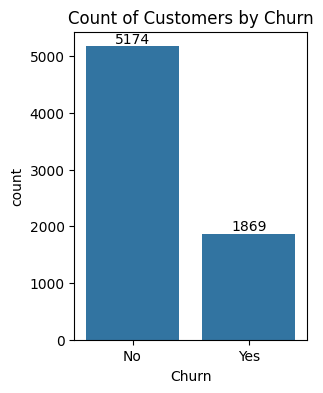

In [9]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

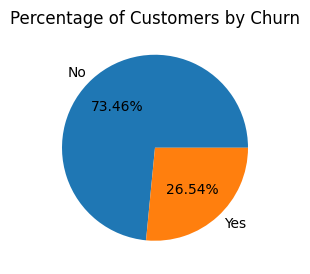

In [10]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn': 'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.title('Percentage of Customers by Churn')
plt.show()

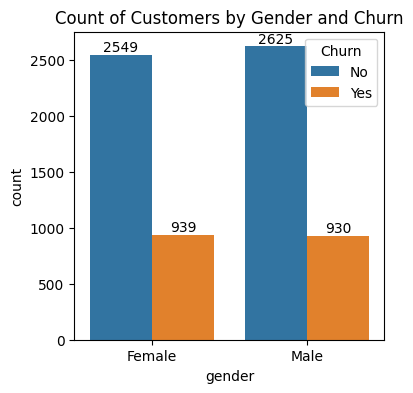

In [11]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x='gender', hue='Churn', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customers by Gender and Churn')
plt.show()

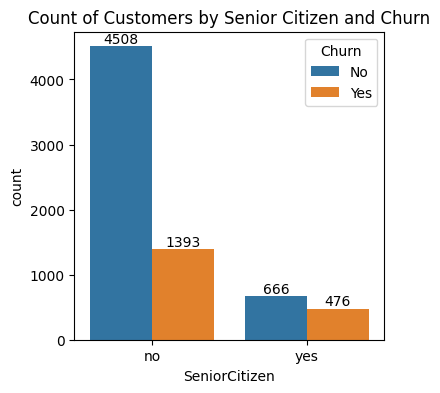

In [12]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customers by Senior Citizen and Churn')
plt.show()

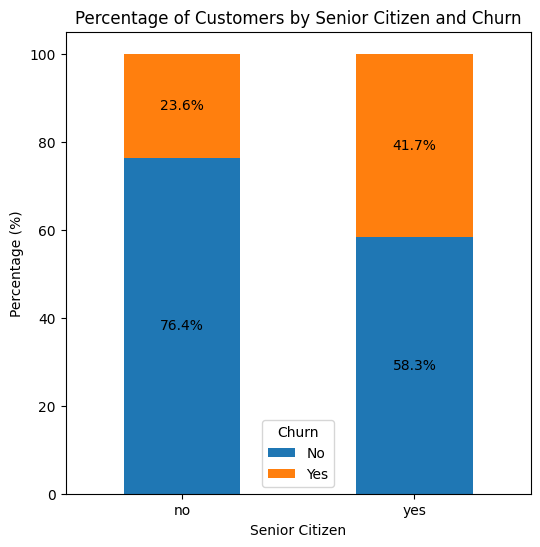

In [13]:
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the stacked bars for each 'Churn' value
df_percentage.plot(kind='bar', stacked=True, ax=ax)

# Add percentage labels on top of each segment in the stacked bar chart
for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Customize the plot
ax.set_title('Percentage of Customers by Senior Citizen and Churn')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Senior Citizen')
plt.xticks(rotation=0)
plt.legend(title='Churn')

plt.show()


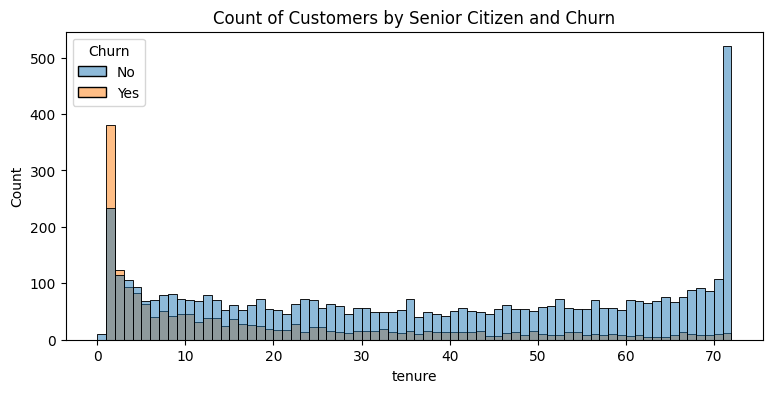

In [14]:
plt.figure(figsize = (9,4))
ax = sns.histplot(x='tenure', hue='Churn', data=df, bins= 72)
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.title('Count of Customers by Senior Citizen and Churn')
plt.show()

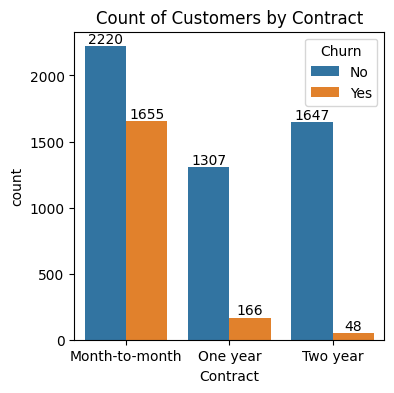

In [15]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x='Contract', hue='Churn', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customers by Contract')
plt.show()

In [16]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

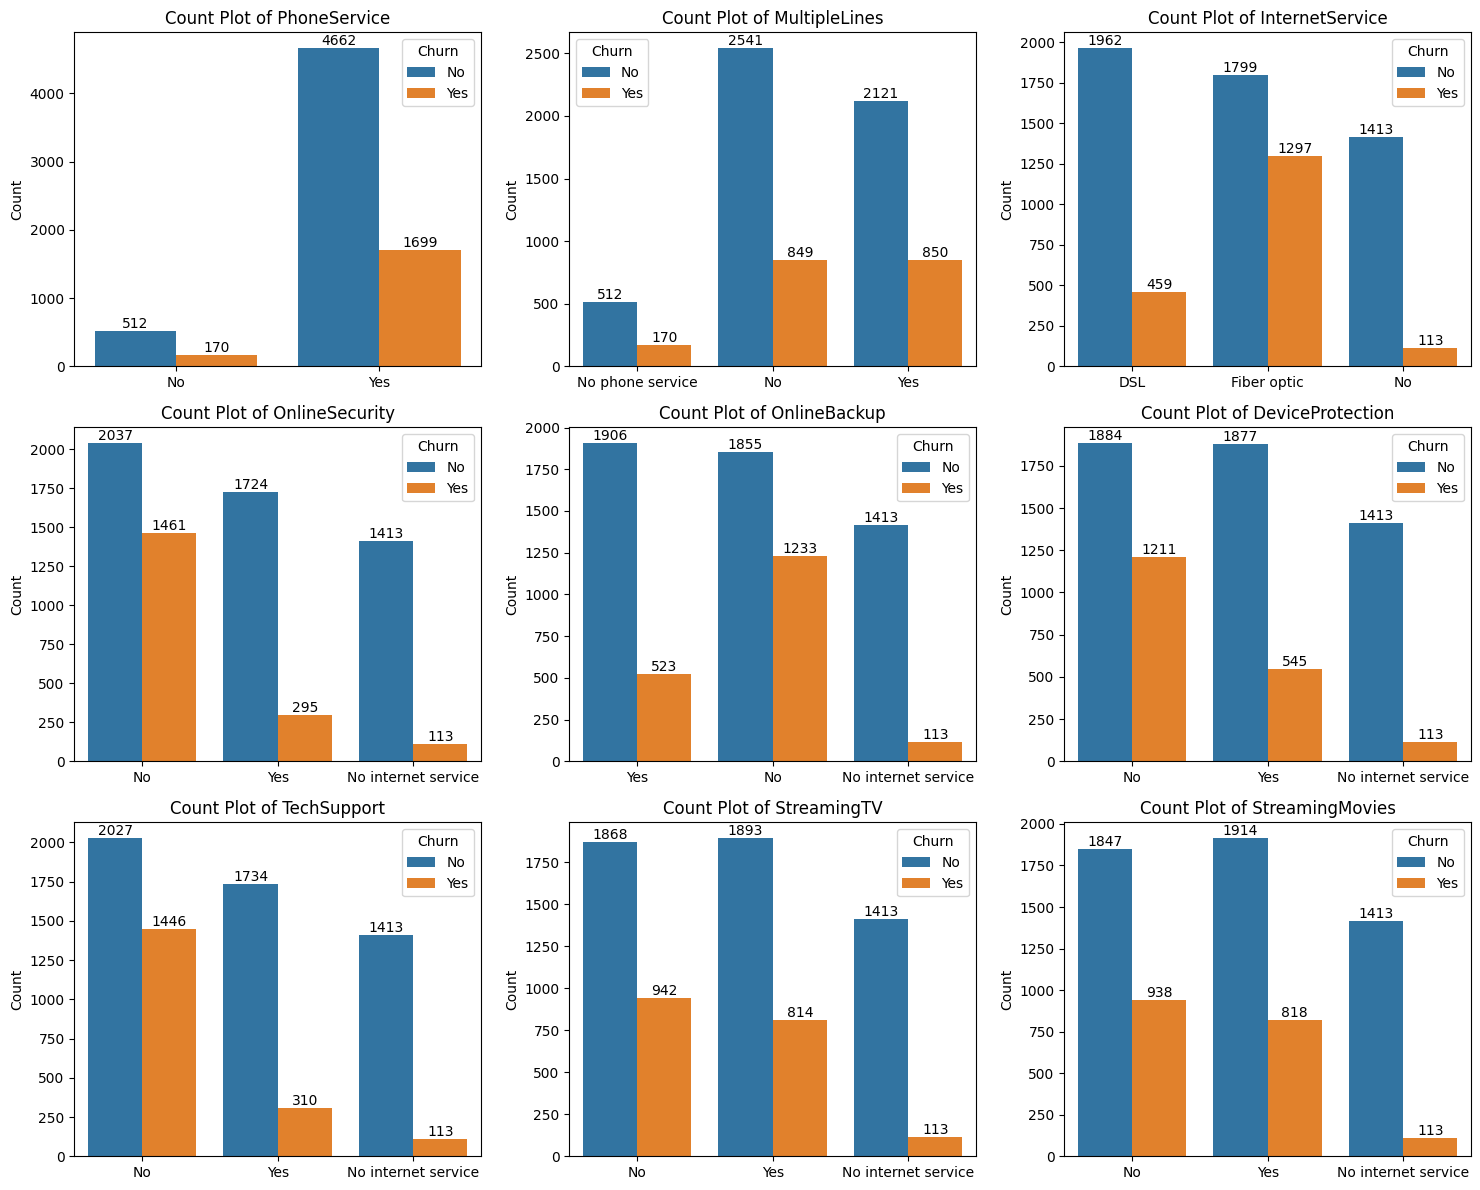

In [19]:
# List of columns to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


# Define the number of rows and columns for the subplots grid
n_rows = 3
n_cols = 3

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column and create a count plot
for i, col in enumerate(columns):
    ax = sns.countplot(x=col, data=df, ax=axes[i], hue = 'Churn')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


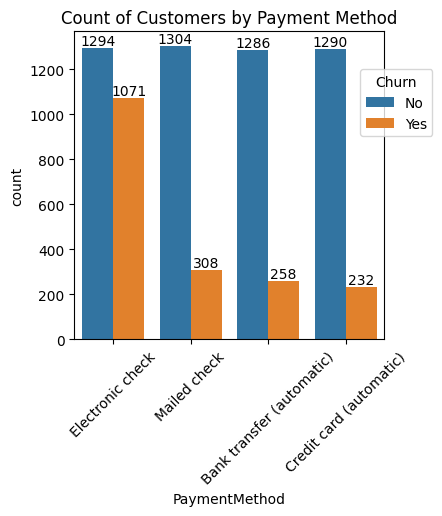

In [21]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customers by Payment Method')
plt.xticks(rotation=45)
plt.legend(title='Churn', bbox_to_anchor = (0.9, 0.9) )
plt.show()